In [1428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [1429]:
#imports dataset into a dataframe
data = pd.read_csv(r'C:\Users\RICHITHA REDDY\Desktop\shopping_behavior.csv')

In [1430]:
#deletes duplicate values
data.drop_duplicates()

Age  Gender     Category  Purchase Amount (USD) Size  Season  \
0      55    Male     Clothing                     53    L  Winter   
1      19    Male     Clothing                     64    L  Winter   
2      50    Male     Clothing                     73    S  Spring   
3      21    Male     Footwear                     90    M  Spring   
4      45    Male     Clothing                     49    M  Spring   
...   ...     ...          ...                    ...  ...     ...   
3895   40  Female     Clothing                     28    L  Summer   
3896   52  Female  Accessories                     49    L  Spring   
3897   46  Female  Accessories                     33    L  Spring   
3898   44  Female     Footwear                     77    S  Summer   
3899   52  Female  Accessories                     81    M  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               3.1                 Yes   Free Shipping              Yes   
3               3.5                 Yes    Next Day Air               No   
4               2.7                 Yes   Free Shipping               No   
...             ...                 ...             ...              ...   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

      Previous Purchases Payment Method Frequency of Purchases  
0                   14.0          Venmo            Fortnightly  
1                    2.0           Cash            Fortnightly  
2                   23.0    Credit Card                 Weekly  
3                   49.0         PayPal                 Weekly  
4                   31.0         PayPal               Annually  
...                  ...            ...                    ...  
3895                32.0          Venmo                 Weekly  
3896                 NaN  Bank Transfer              Bi-Weekly  
3897                24.0          Venmo              Quarterly  
3898                24.0          Venmo                 Weekly  
3899                33.0          Venmo              Quarterly  

[3900 rows x 13 columns]

In [1433]:
# Drop rows with any NaN values from the entire DataFrame
data.dropna(inplace=True)
missing_values = data.isna().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Size                      0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [1432]:
#counts rows and columns
data.shape

(3886, 13)

In [1434]:
#displaying all the missing values present in the dataset
print("\nData type:")
print(data.info())


Data type:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 3899
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3886 non-null   int64  
 1   Gender                  3886 non-null   object 
 2   Category                3886 non-null   object 
 3   Purchase Amount (USD)   3886 non-null   int64  
 4   Size                    3886 non-null   object 
 5   Season                  3886 non-null   object 
 6   Review Rating           3886 non-null   float64
 7   Subscription Status     3886 non-null   object 
 8   Shipping Type           3886 non-null   object 
 9   Discount Applied        3886 non-null   object 
 10  Previous Purchases      3886 non-null   float64
 11  Payment Method          3886 non-null   object 
 12  Frequency of Purchases  3886 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 425.0+ KB
None


In [1435]:
#complete statistics about the dataset
print(data.describe())

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3886.000000            3886.000000    3886.000000         3886.000000
mean     44.067936              59.768914       3.750026           25.391662
std      15.212896              23.683436       0.715954           14.441787
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


## Handling Outliers 

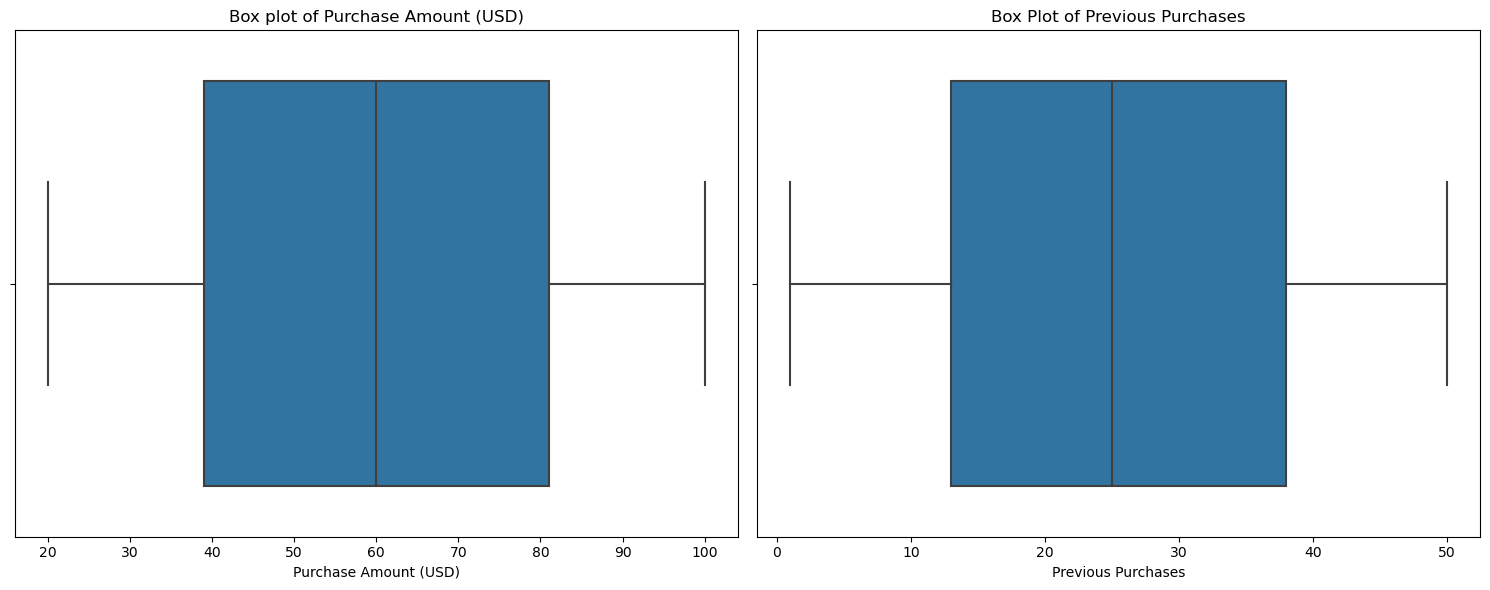

In [1436]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot box plot for 'Purchase Amount (USD)'
sns.boxplot(x=data['Purchase Amount (USD)'], ax=axes[0])
axes[0].set_xlabel('Purchase Amount (USD)')
axes[0].set_title('Box plot of Purchase Amount (USD)')

# Plot box plot for 'Previous Purchases'
sns.boxplot(x=data['Previous Purchases'], ax=axes[1])
axes[1].set_xlabel('Previous Purchases')
axes[1].set_title('Box Plot of Previous Purchases')

# Adjust layout
plt.tight_layout()
plt.show()


## Data Visualization

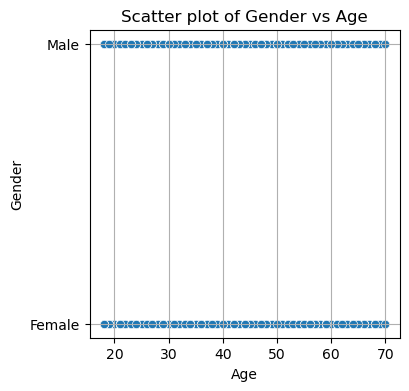

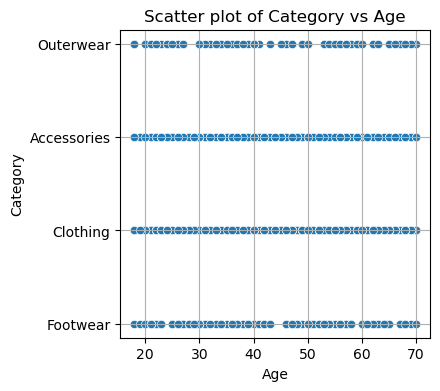

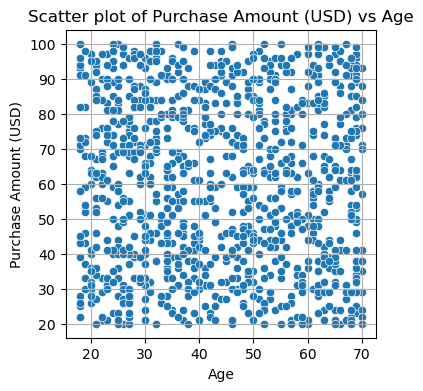

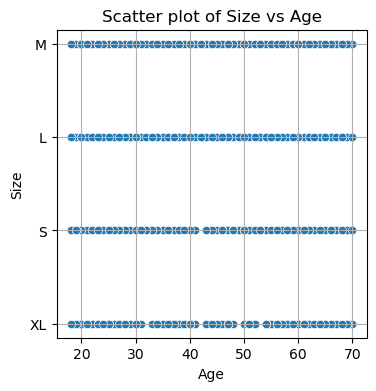

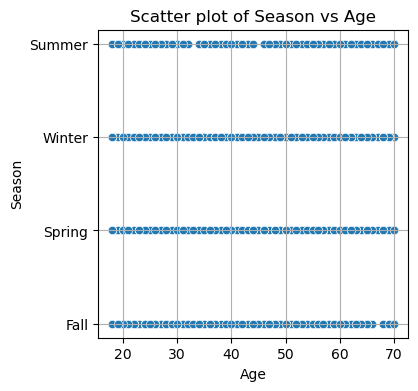

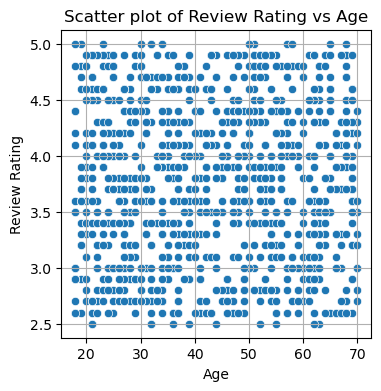

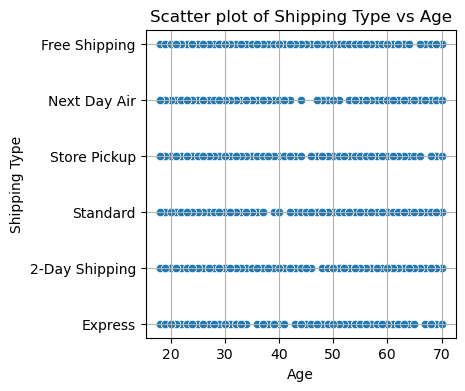

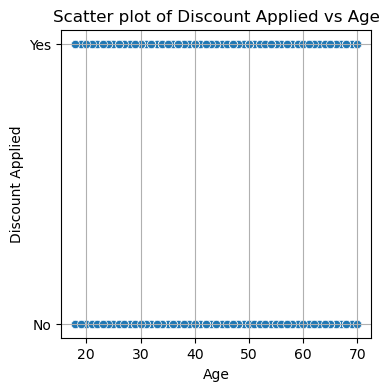

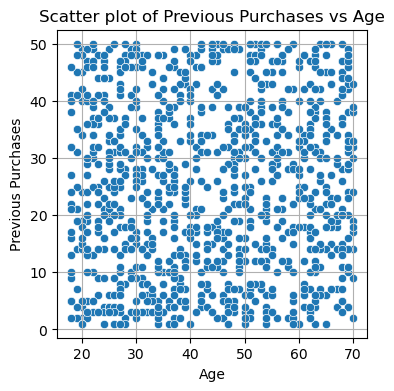

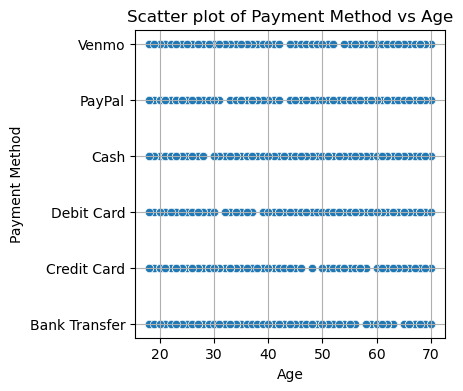

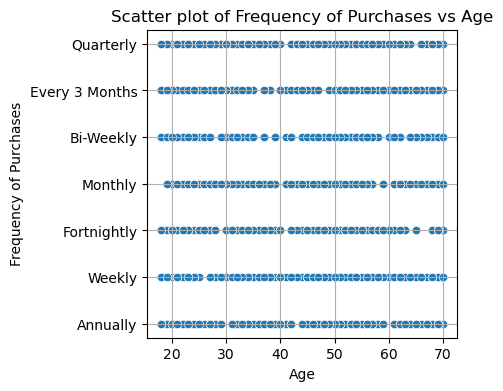

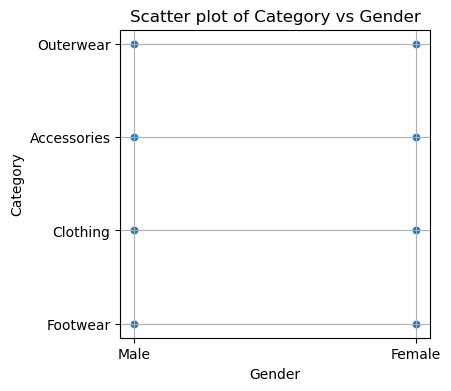

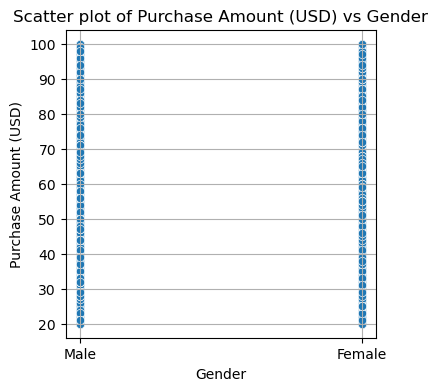

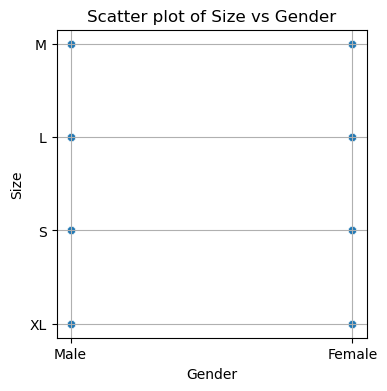

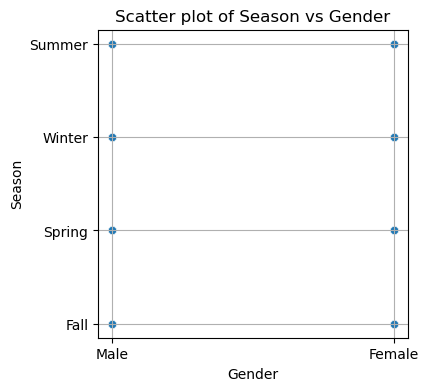

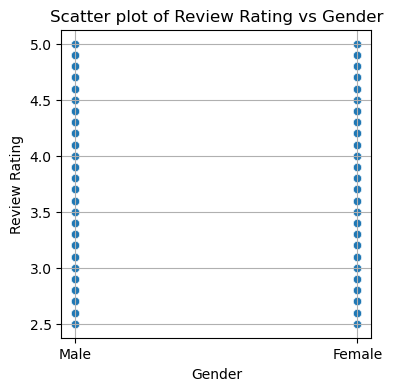

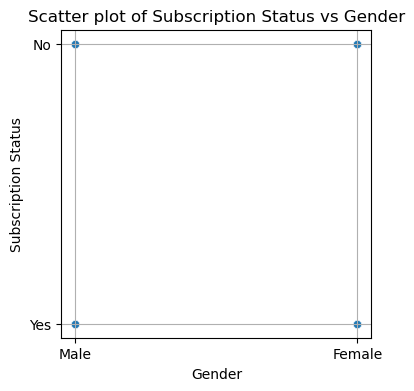

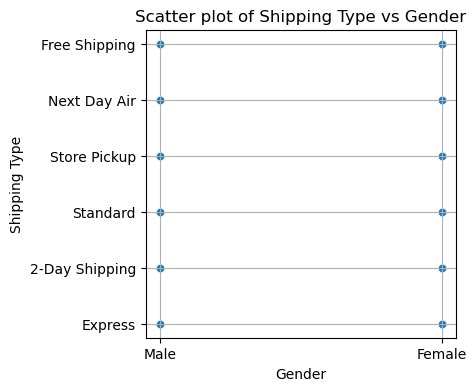

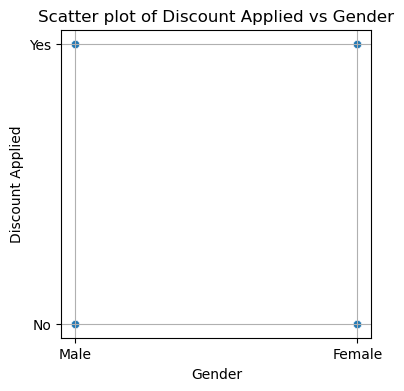

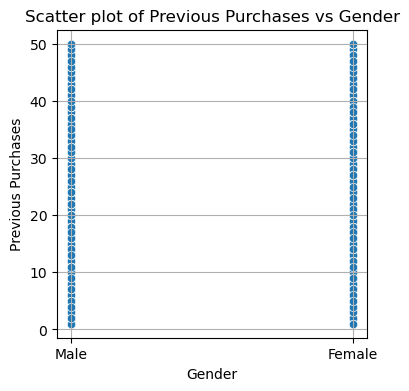

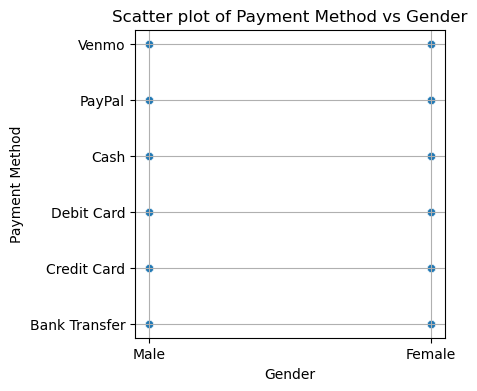

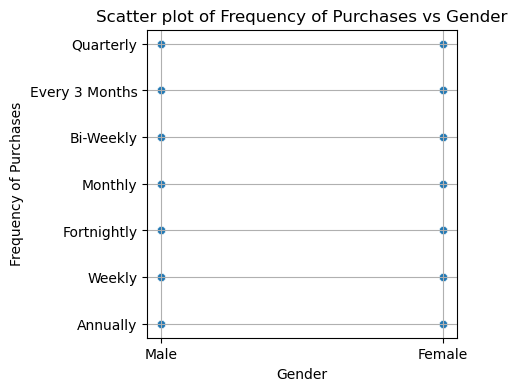

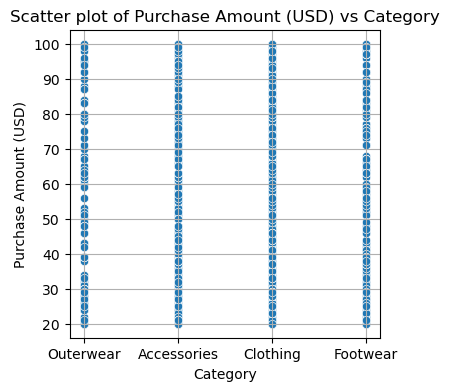

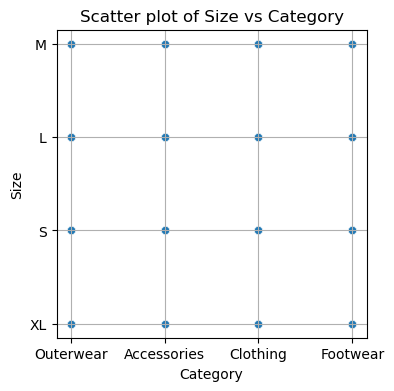

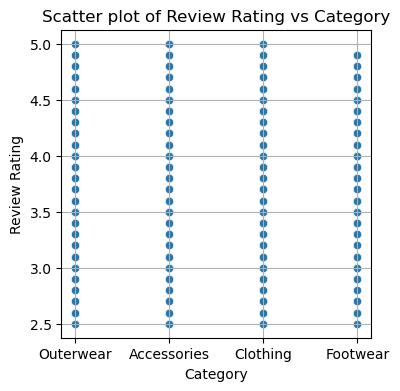

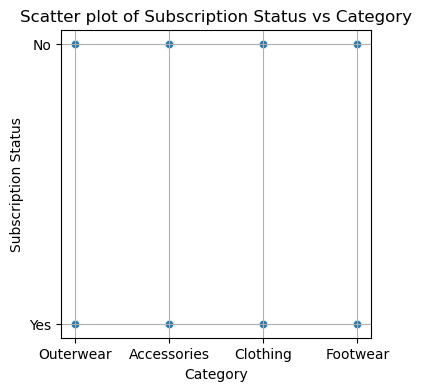

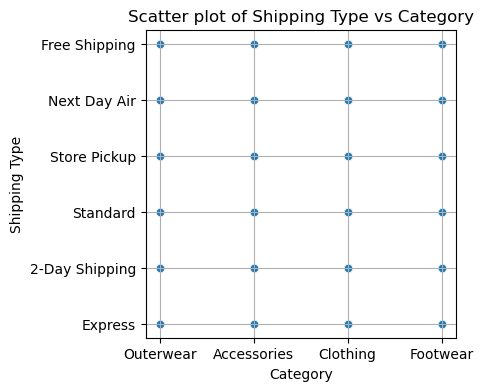

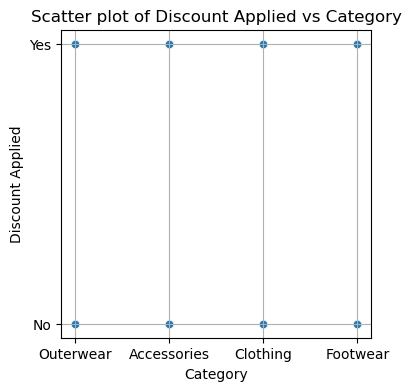

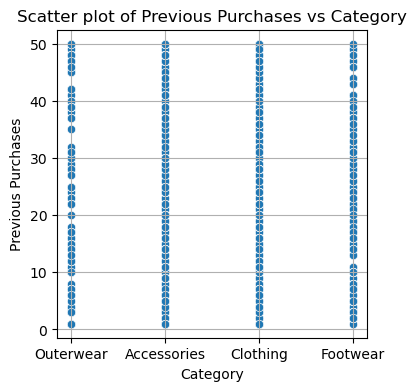

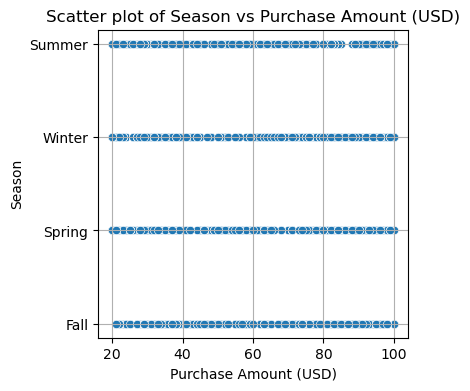

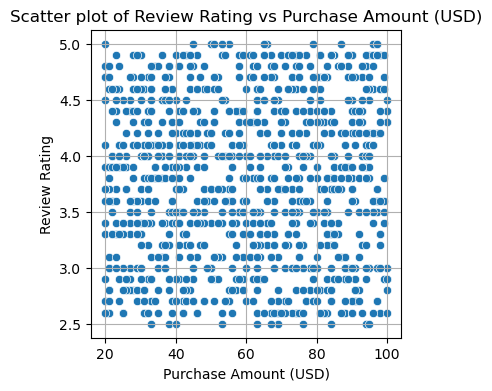

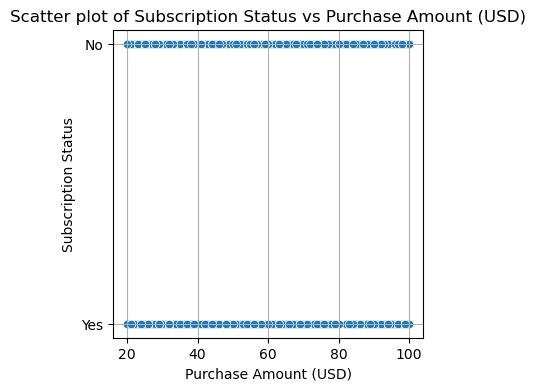

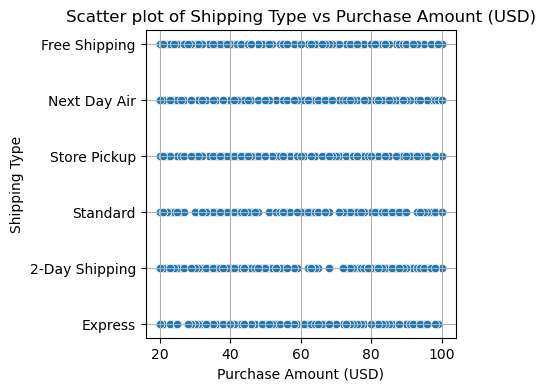

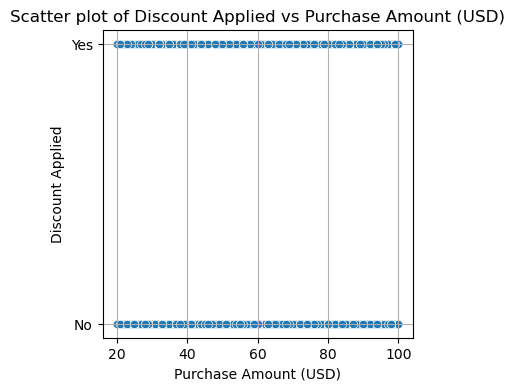

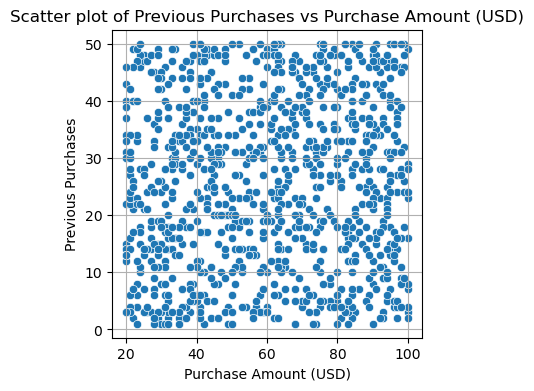

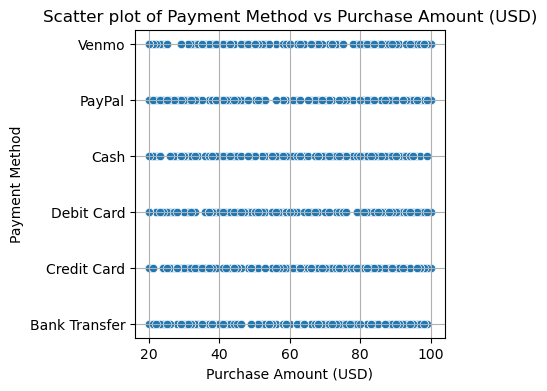

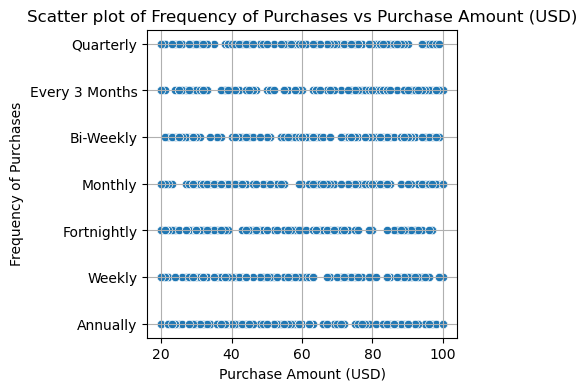

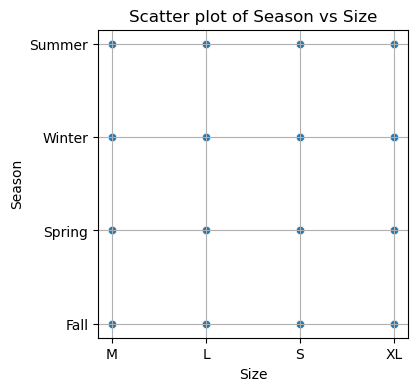

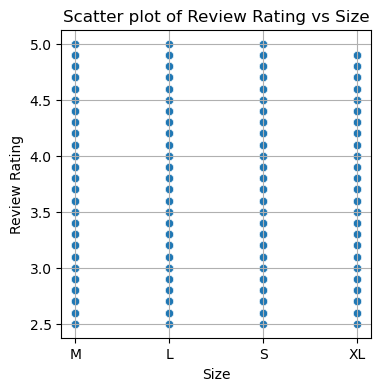

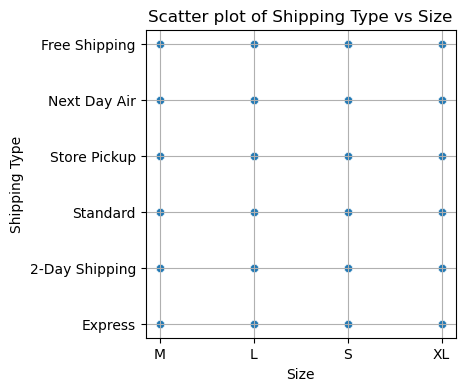

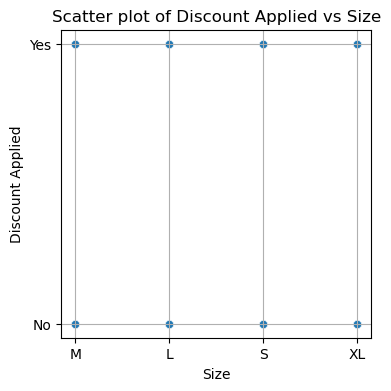

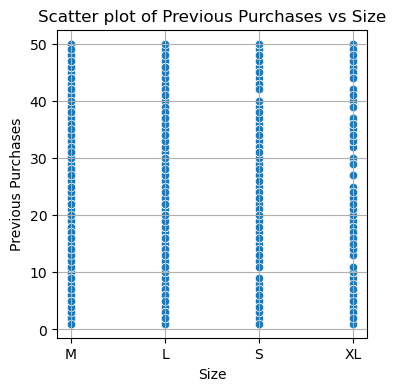

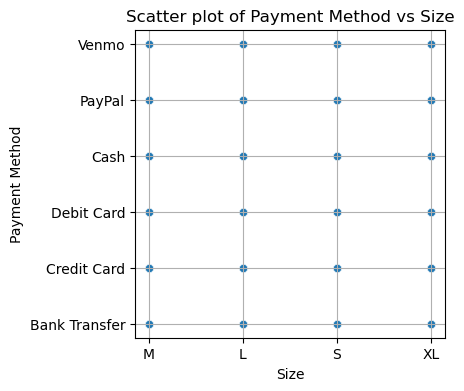

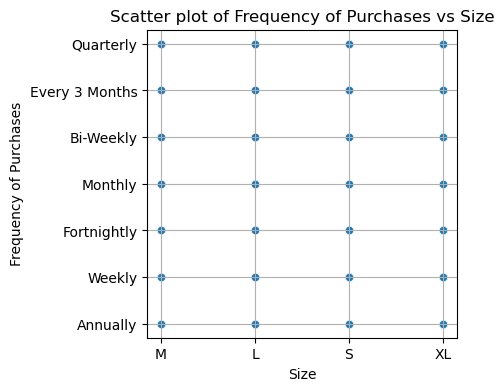

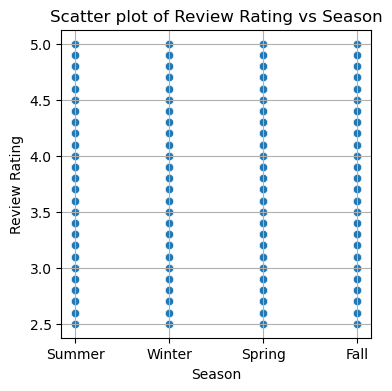

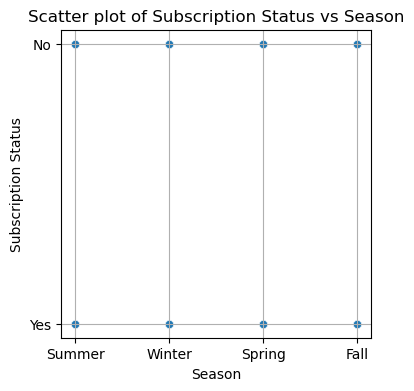

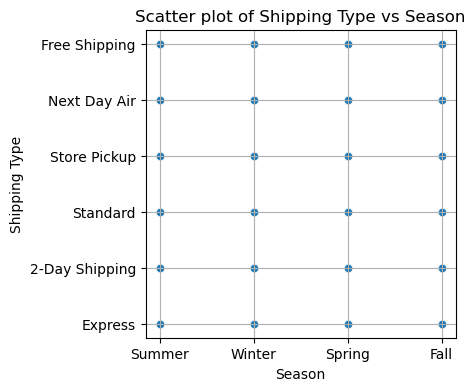

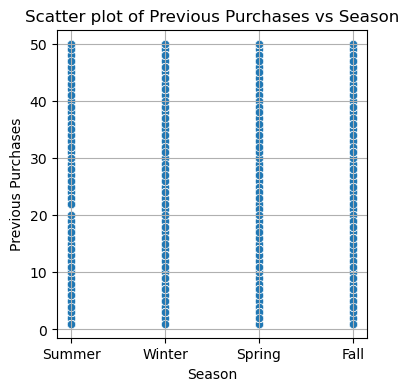

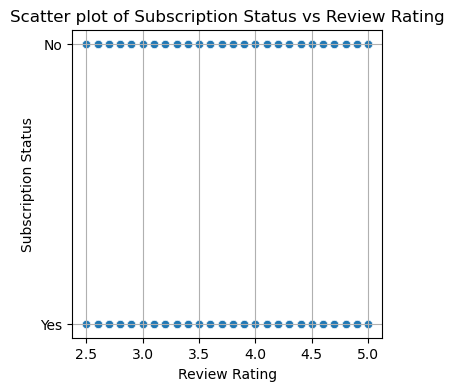

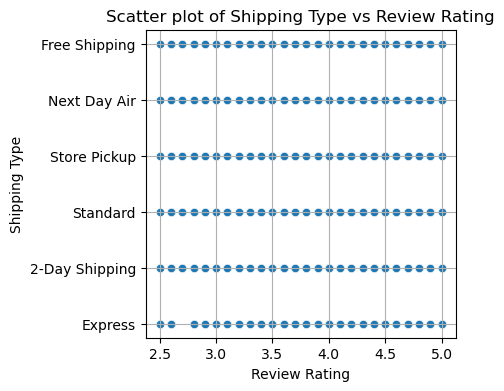

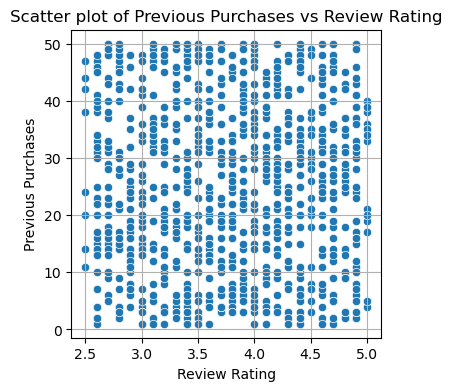

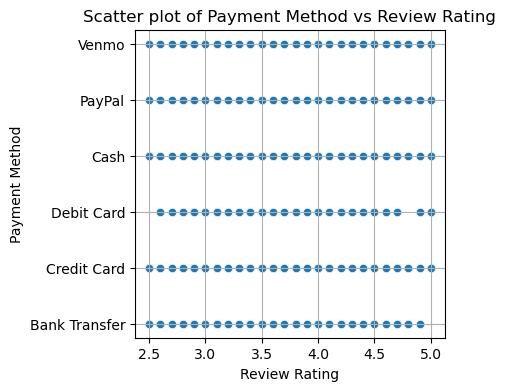

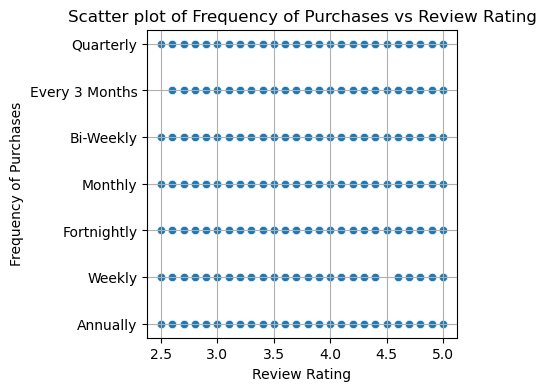

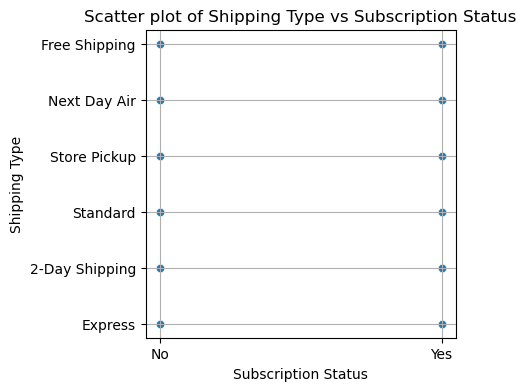

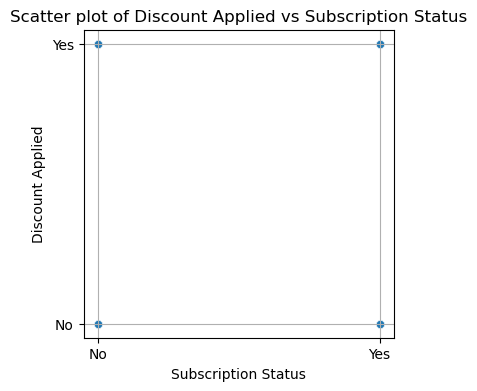

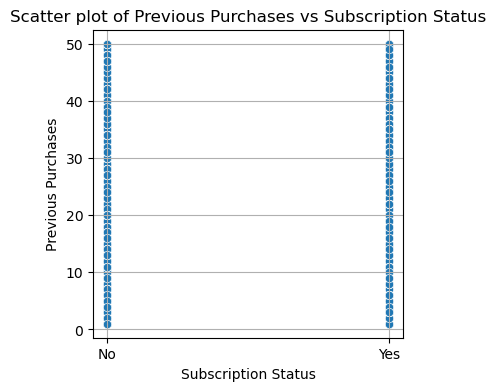

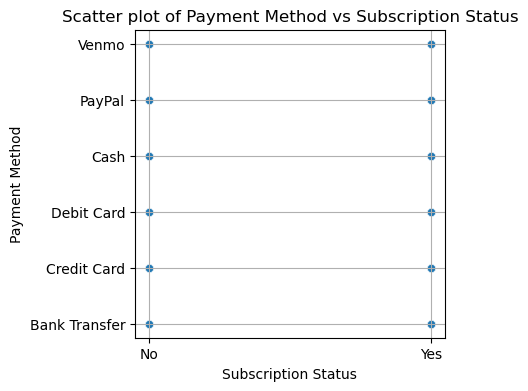

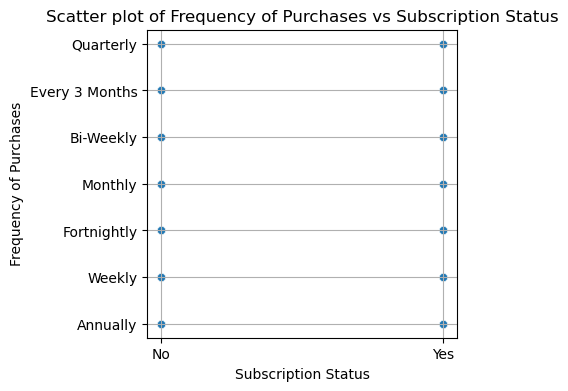

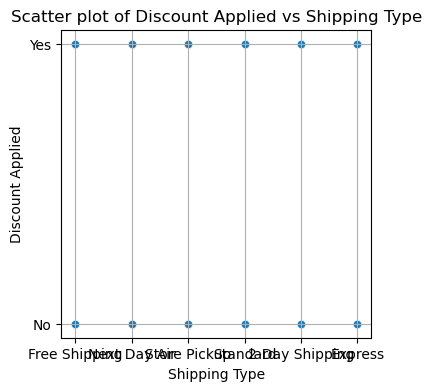

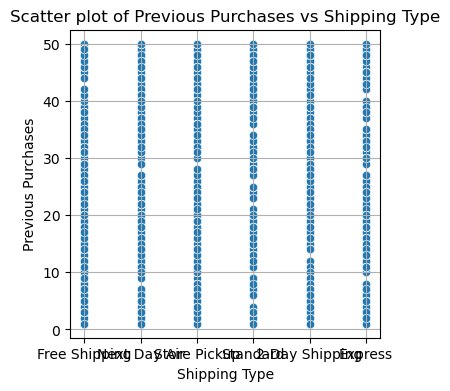

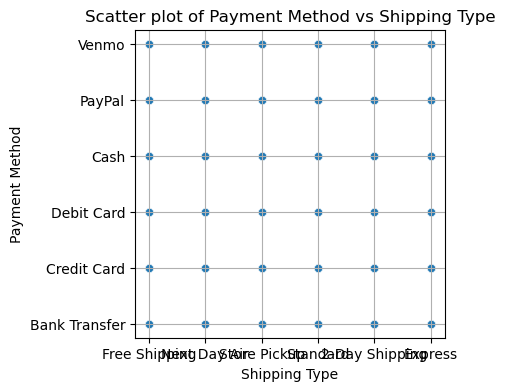

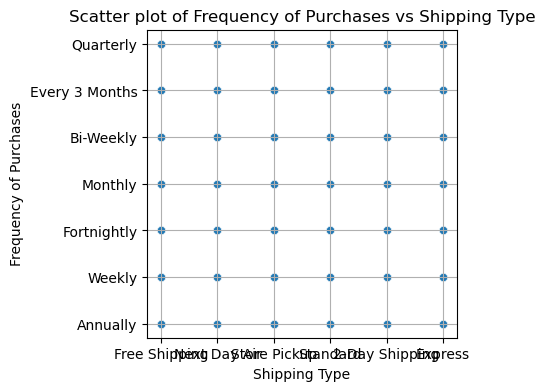

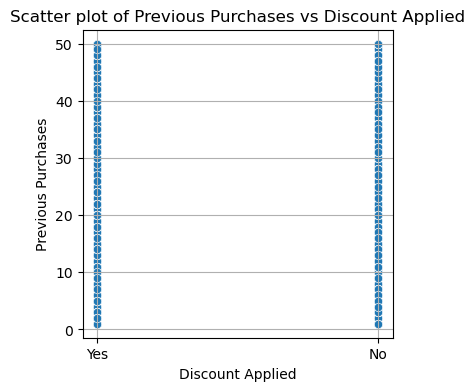

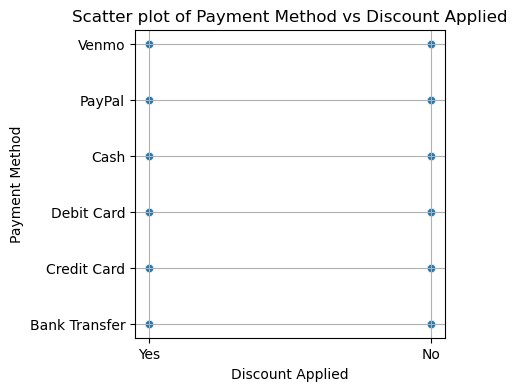

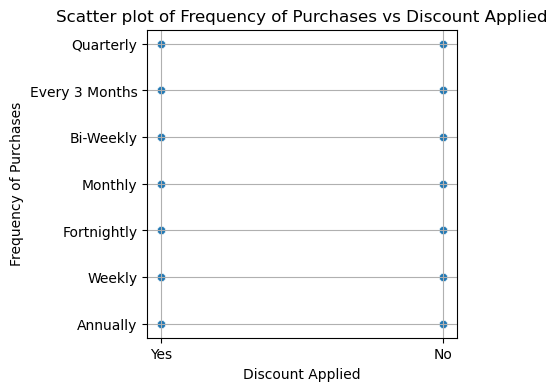

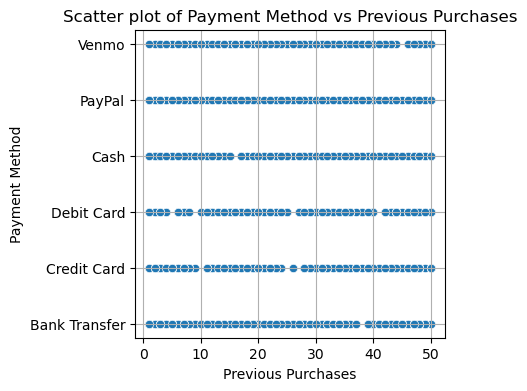

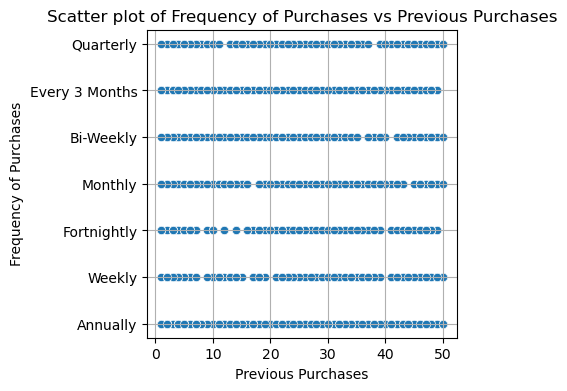

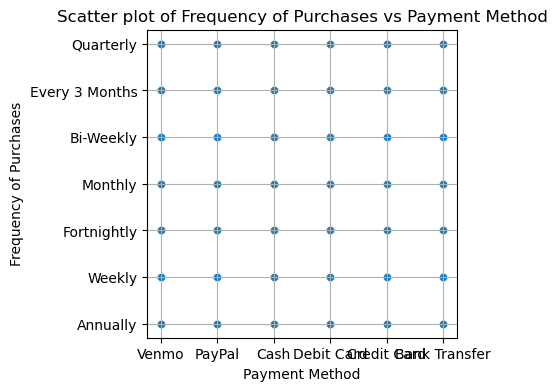

In [1437]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Load the dataset into a DataFrame
data = pd.read_csv(r'C:\Users\RICHITHA REDDY\Desktop\shopping_behavior.csv')

# Select a random subset of 1000 observations
random_indices = random.sample(range(len(data)), 1000)
random_data = data.iloc[random_indices]

# Get list of all variables
variables = data.columns

# Create scatter plots for all pairs of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        plt.figure(figsize=(4, 4))
        sns.scatterplot(x=variables[i], y=variables[j], data=random_data)
        plt.title(f'Scatter plot of {variables[j]} vs {variables[i]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.grid(True)
        plt.show()


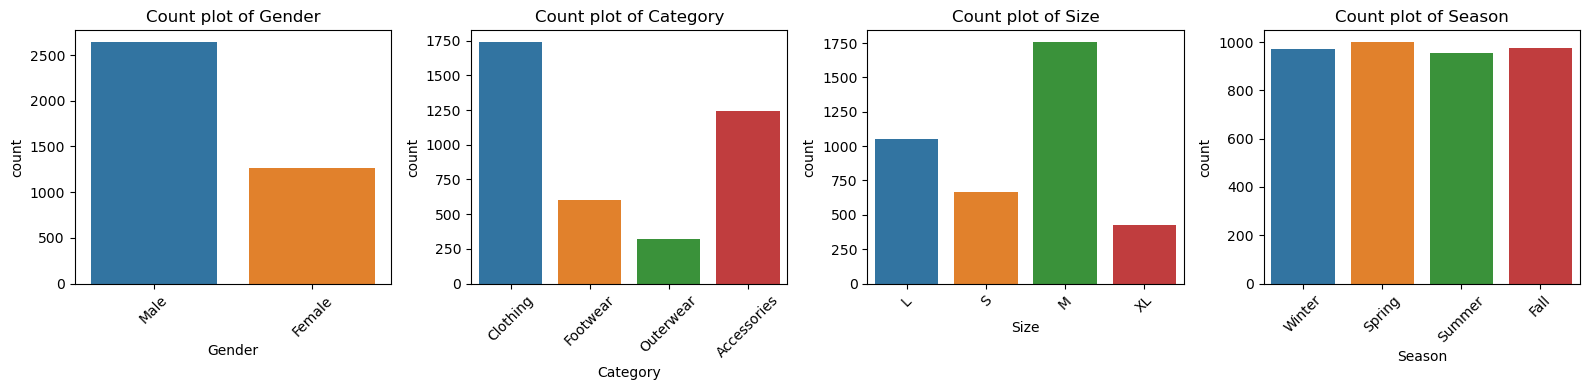

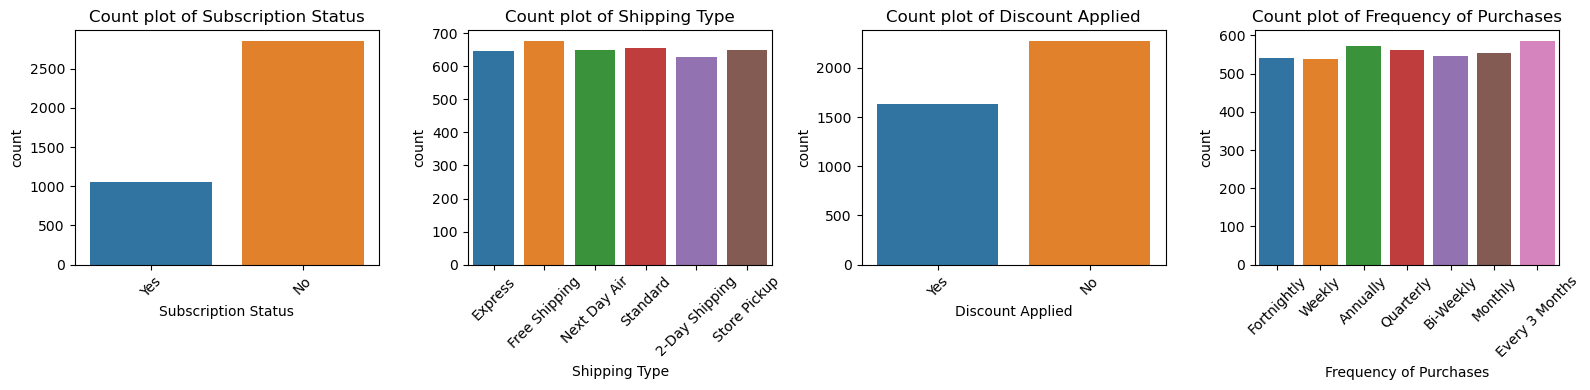

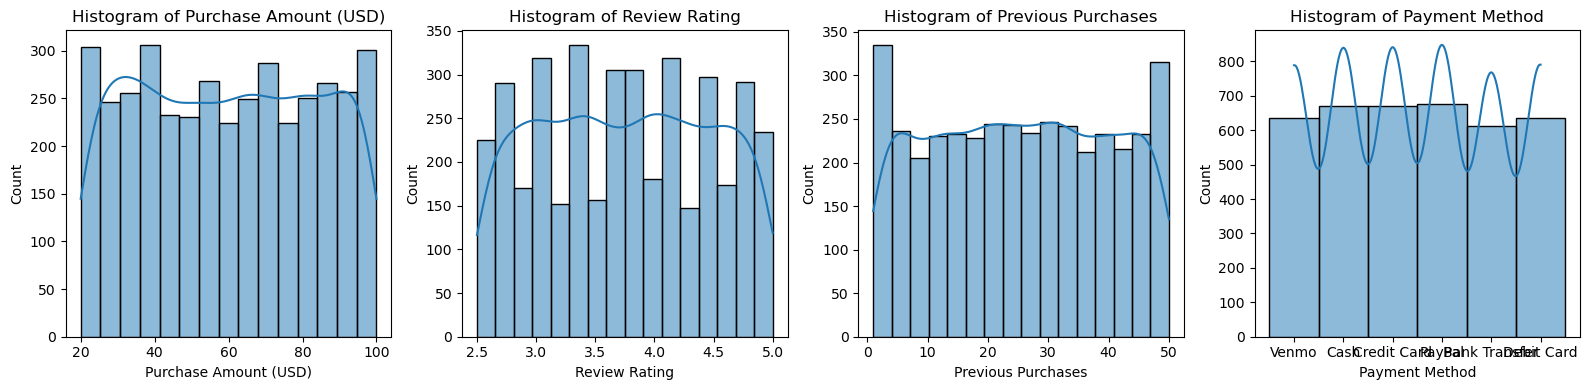

In [1438]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data

# Univariate analysis for categorical variables
categorical_columns = ['Gender', 'Category', 'Size', 'Season', 'Subscription Status', 
                       'Shipping Type', 'Discount Applied', 'Frequency of Purchases']

num_rows = len(categorical_columns) // 4 + (len(categorical_columns) % 4 > 0)  # Calculate number of rows needed

for i in range(num_rows):
    plt.figure(figsize=(16, 4))  # Adjust figure size
    for j in range(4):
        index = i * 4 + j
        if index < len(categorical_columns):
            plt.subplot(1, 4, j+1)
            sns.countplot(data=data, x=categorical_columns[index])
            plt.title(f'Count plot of {categorical_columns[index]}')
            plt.xticks(rotation=45)
            plt.tight_layout()
    plt.show()

# Univariate analysis for numerical variables
numerical_columns = ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Payment Method']

num_rows = len(numerical_columns) // 4 + (len(numerical_columns) % 4 > 0)  # Calculate number of rows needed

for i in range(num_rows):
    plt.figure(figsize=(16, 4))  # Adjust figure size
    for j in range(4):
        index = i * 4 + j
        if index < len(numerical_columns):
            plt.subplot(1, 4, j+1)
            sns.histplot(data=data[numerical_columns[index]], kde=True)
            plt.title(f'Histogram of {numerical_columns[index]}')

            plt.tight_layout()
    plt.show()


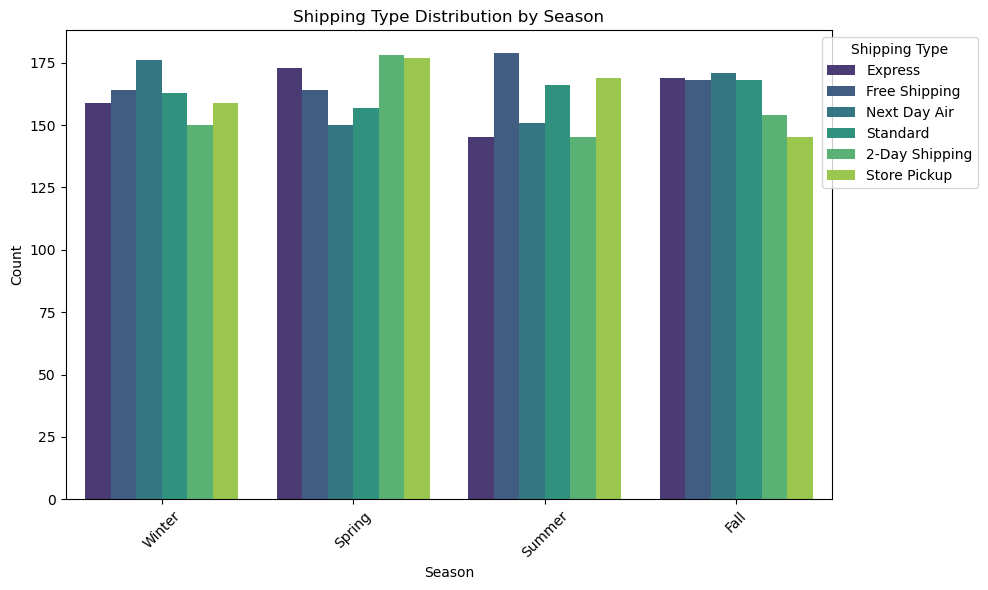

In [1439]:
# Create the bar plot on shipping type distribution by season
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Shipping Type', data=data, palette='viridis')

# Add labels and title
plt.title('Shipping Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the legend with labels
plt.legend(title='Shipping Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Show the plot
plt.show()


In [1440]:
# Calculate counts of shipping types in different seasons
season_shipping_counts = data.groupby(['Season', 'Shipping Type']).size().unstack()

# Print the counts
print("Count of Shipping Types in Different Seasons:")
print(season_shipping_counts)


Count of Shipping Types in Different Seasons:
Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Season                                                                          
Fall                      154      169            168           171       168   
Spring                    178      173            164           150       157   
Summer                    145      145            179           151       166   
Winter                    150      159            164           176       163   

Shipping Type  Store Pickup  
Season                       
Fall                    145  
Spring                  177  
Summer                  169  
Winter                  159  


In [1441]:
# Define age groups
age_groups = {
    'Young Adult': (18, 35),
    'Adult': (36, 50),
    'Middle-Aged': (51, 65),
    'Senior': (65, float('inf'))  # 'inf' represents infinity for ages above 65
}

# Function to categorize age
def categorize_age(age):
    for group, (min_age, max_age) in age_groups.items():
        if min_age <= age <= max_age:
            return group
    return 'Unknown'

# Apply categorization to the 'Age' column
data['Age Group'] = data['Age'].apply(categorize_age)

# Drop the 'Age' column
data.drop(columns=['Age'], inplace=True)

# Encode the 'Age Group' column with values 0, 1, 2, 3
age_group_encoding = {
    'Young Adult': 0,
    'Adult': 1,
    'Middle-Aged': 2,
    'Senior': 3
}

data['Age Group Encoded'] = data['Age Group'].map(age_group_encoding)

# Display the first few rows to verify the changes
print(data[['Age Group', 'Age Group Encoded']].head())

# Define the threshold value separating "High" and "Low" tiers
threshold = 50

# Create a new column 'Purchase Amount Tier' based on the threshold
data['Purchase Amount Tier'] = np.where(data['Purchase Amount (USD)'] >= threshold, 1, 0)


     Age Group  Age Group Encoded
0  Middle-Aged                  2
1  Young Adult                  0
2        Adult                  1
3  Young Adult                  0
4        Adult                  1


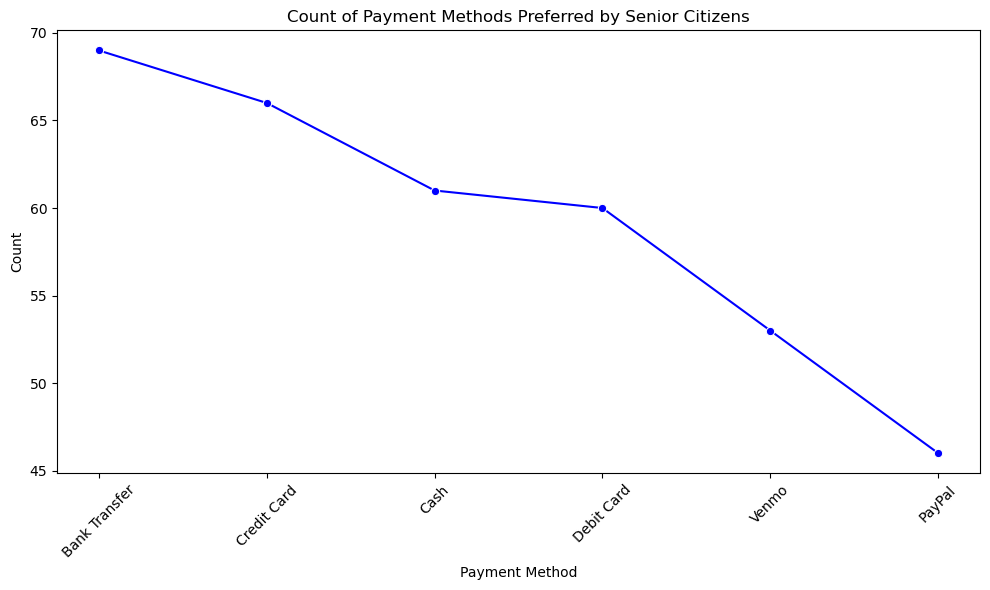

In [1442]:
#count plot of payment methods for senior citizens
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for senior citizens
senior_data = data[data['Age Group'] == 'Senior']

# Group by 'Payment Method' and calculate the count of each payment method for senior citizens
payment_method_counts = senior_data['Payment Method'].value_counts().reset_index()
payment_method_counts.columns = ['Payment Method', 'Count']

# Sort the dataframe by count in descending order
payment_method_counts = payment_method_counts.sort_values(by='Count', ascending=False)

# Create a line graph to visualize the count of payment methods preferred by senior citizens
plt.figure(figsize=(10, 6))
sns.lineplot(x='Payment Method', y='Count', data=payment_method_counts, marker='o', color='blue')
plt.title('Count of Payment Methods Preferred by Senior Citizens')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


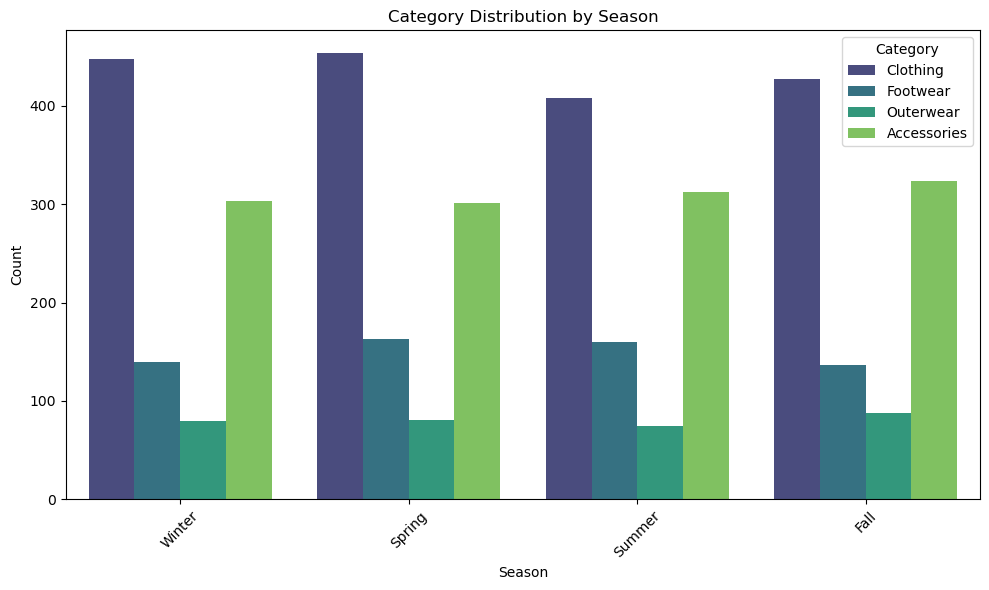

In [1443]:
#Category Distribution by Season
import seaborn as sns
import matplotlib.pyplot as plt

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Category', data=data, palette='viridis')
plt.title('Category Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()


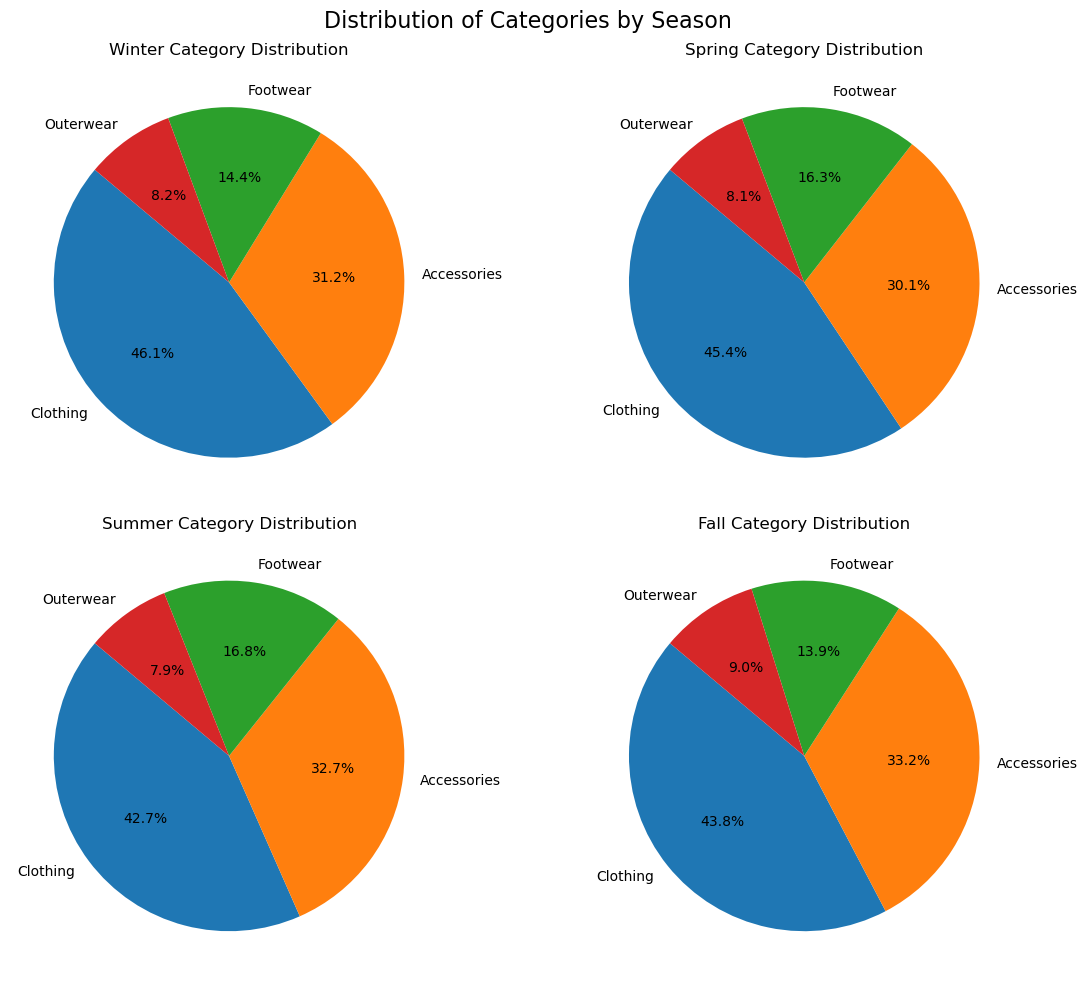

In [1444]:
#Distribution of Categories by Season 
import seaborn as sns
import matplotlib.pyplot as plt

# Define the seasons and categories
seasons = data['Season'].unique()
categories = data['Category'].unique()

# Create subplots for each season
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = data[data['Season'] == season]
    
    # Calculate counts for each category in the current season
    category_counts = season_data['Category'].value_counts()
    
    # Plot the pie chart for the current season
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{season} Category Distribution')
fig.suptitle('Distribution of Categories by Season', fontsize=16)
plt.tight_layout()
plt.show()


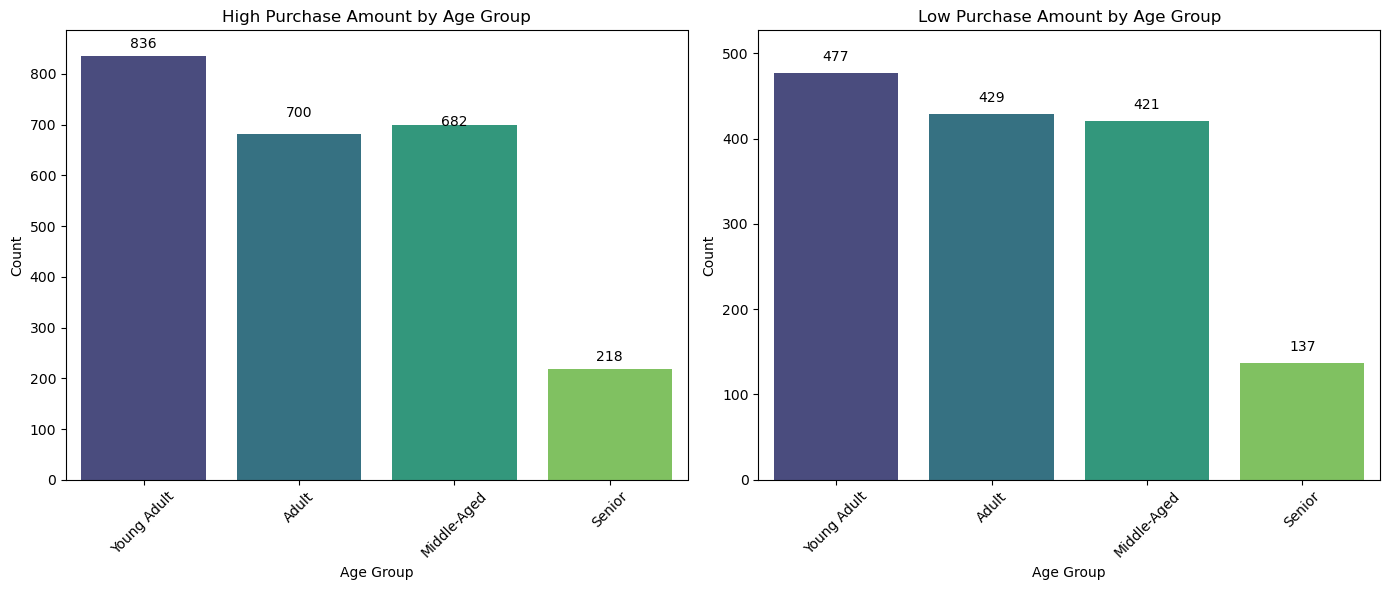

In [1445]:
#Purchase count in different age groups
# Filter the data for High and Low purchase amounts
data_high = data[data['Purchase Amount Tier'] == 1]
data_low = data[data['Purchase Amount Tier'] == 0]

# Create separate bar plots for High and Low purchase amounts
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Age Group', data=data_high, palette='viridis', order=['Young Adult', 'Adult', 'Middle-Aged', 'Senior'])
plt.title('High Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(data_high['Age Group'].value_counts()) + 50)

# Label bars with 'High'
for i, value in enumerate(data_high['Age Group'].value_counts().values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.subplot(1, 2, 2)
sns.countplot(x='Age Group', data=data_low, palette='viridis', order=['Young Adult', 'Adult', 'Middle-Aged', 'Senior'])
plt.title('Low Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(data_low['Age Group'].value_counts()) + 50)

# Label bars with 'Low'
for i, value in enumerate(data_low['Age Group'].value_counts().values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


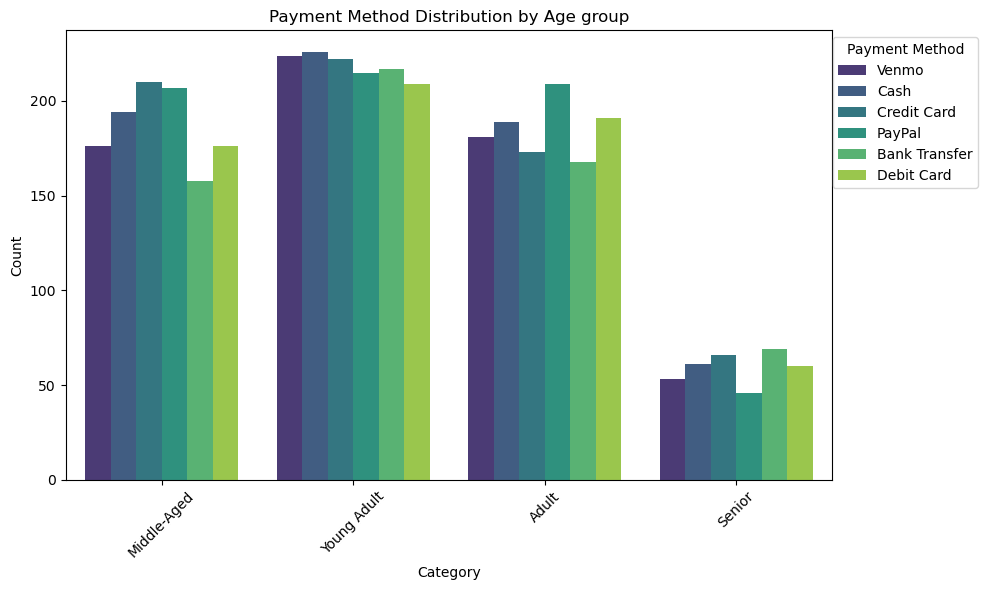

In [1446]:
#ayment Method Distribution by Age group
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='Payment Method', data=data, palette='viridis')
plt.title('Payment Method Distribution by Age group')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


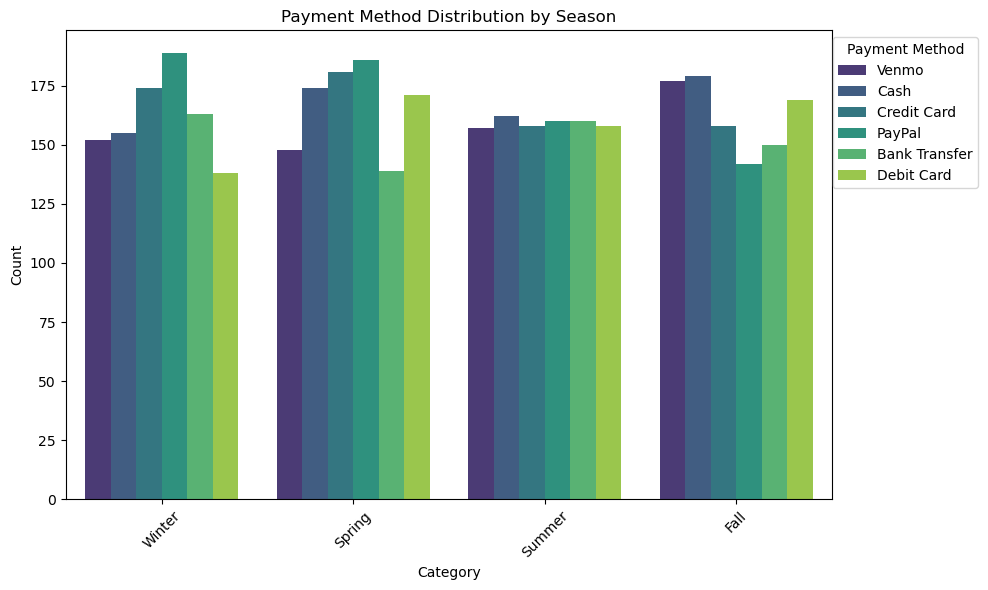

In [1447]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Payment Method', data=data, palette='viridis')
plt.title('Payment Method Distribution by Season')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


In [1448]:
# Define the threshold value separating "High" and "Low" tiers
threshold = 50

# Create a new column 'Purchase Amount Tier' based on the threshold
data['Purchase Amount Tier'] = np.where(data['Purchase Amount (USD)'] >= threshold, 1, 0)

# Display the counts of each tier
print(data['Purchase Amount Tier'].value_counts())


1    2436
0    1464
Name: Purchase Amount Tier, dtype: int64


<Figure size 1000x600 with 0 Axes>

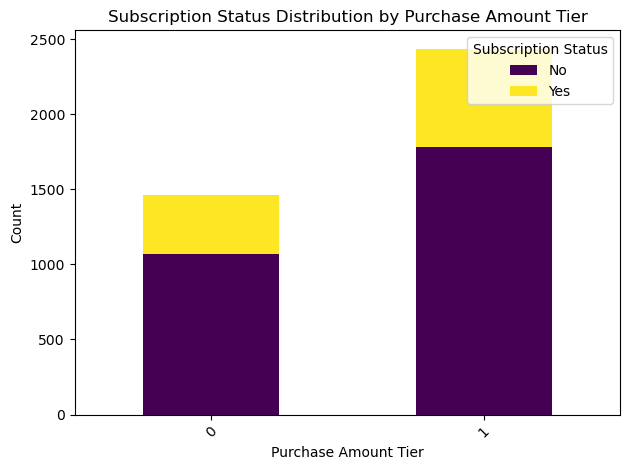

In [1449]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to aggregate the data
pivot_data = data.pivot_table(index='Purchase Amount Tier', columns='Subscription Status', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.title('Subscription Status Distribution by Purchase Amount Tier')
plt.xlabel('Purchase Amount Tier')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Subscription Status', labels=['No', 'Yes'], loc='upper right')  # Adjust legend labels
plt.tight_layout()

# Show the plot
plt.show()


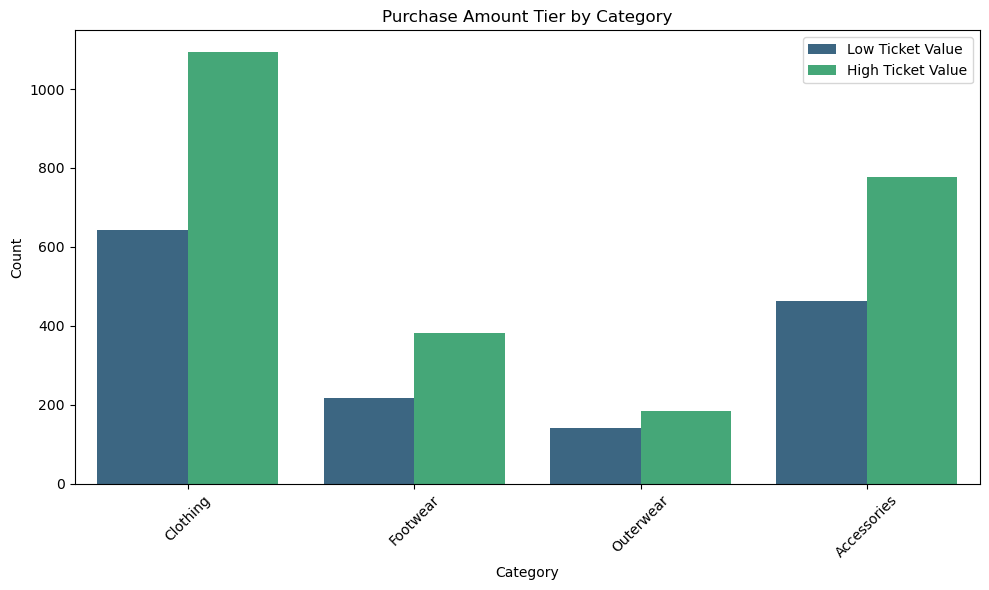

In [1450]:
#Purchase Amount Tie by category
import seaborn as sns
import matplotlib.pyplot as plt

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Purchase Amount Tier', data=data, palette='viridis')
plt.title('Purchase Amount Tier by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Purchase Amount Tier', loc='upper right')

# Customize legend labels
legend_labels = ['Low Ticket Value', 'High Ticket Value']
plt.legend(legend_labels)

plt.tight_layout()
plt.show()



In [1451]:
# Calculate counts of shipping types in different seasons
season_shipping_counts = data.groupby(['Season', 'Shipping Type']).size().unstack()

# Print the counts
print("Count of Shipping Types in Different Seasons:")
print(season_shipping_counts)


Count of Shipping Types in Different Seasons:
Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Season                                                                          
Fall                      154      169            168           171       168   
Spring                    178      173            164           150       157   
Summer                    145      145            179           151       166   
Winter                    150      159            164           176       163   

Shipping Type  Store Pickup  
Season                       
Fall                    145  
Spring                  177  
Summer                  169  
Winter                  159  


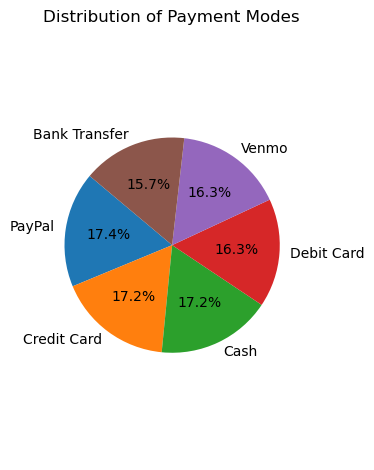

In [1452]:
#distribution of payement Methods
import matplotlib.pyplot as plt

# Count the frequency of purchases
frequency_counts = data['Frequency of Purchases'].value_counts()

# Count the frequency of payment modes
payment_mode_counts = data['Payment Method'].value_counts()

# Create a pie chart for payment modes
plt.subplot(1, 2, 2)
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Modes')
plt.axis('equal')

plt.tight_layout()
plt.show()


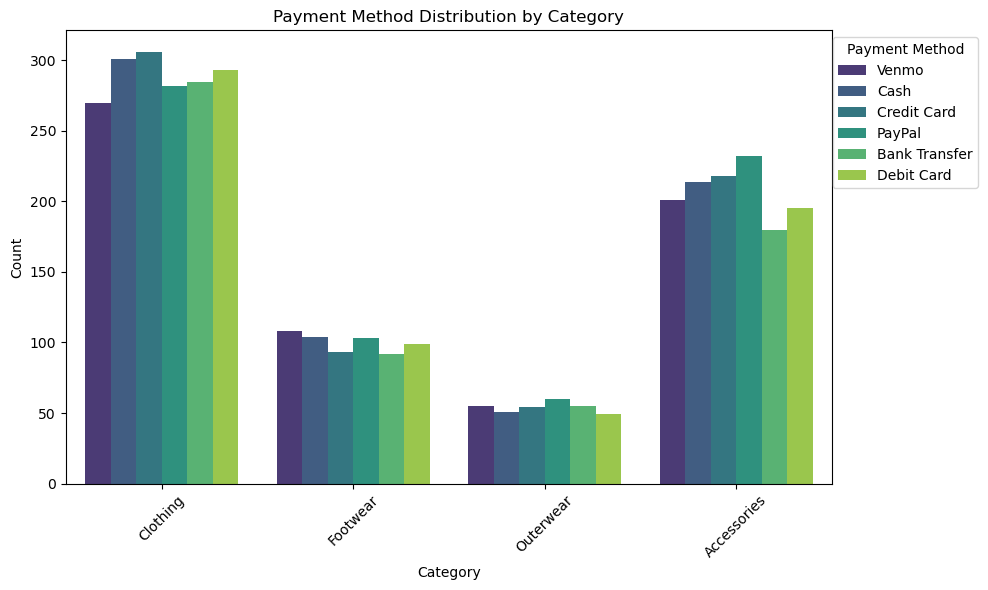

In [1453]:
#Payment Method Distribution by Season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', hue='Payment Method', data=data, palette='viridis')
plt.title('Payment Method Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Payment Method', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

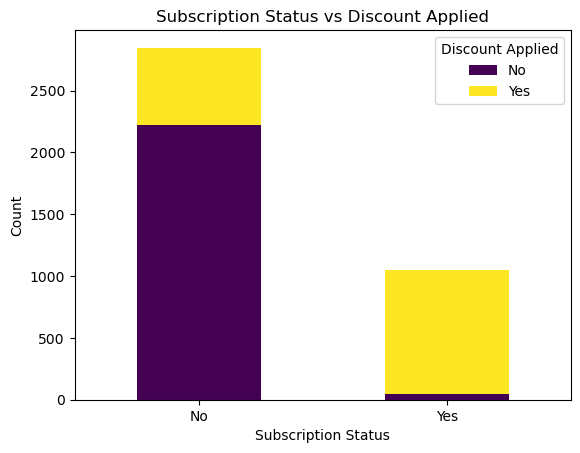

In [1454]:

# Create a pivot table for subscribed users vs discount applies
pivot_data = data.pivot_table(index='Subscription Status', columns='Discount Applied', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.title('Subscription Status vs Discount Applied')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Discount Applied', loc='upper right')

# Show the plot
plt.show()


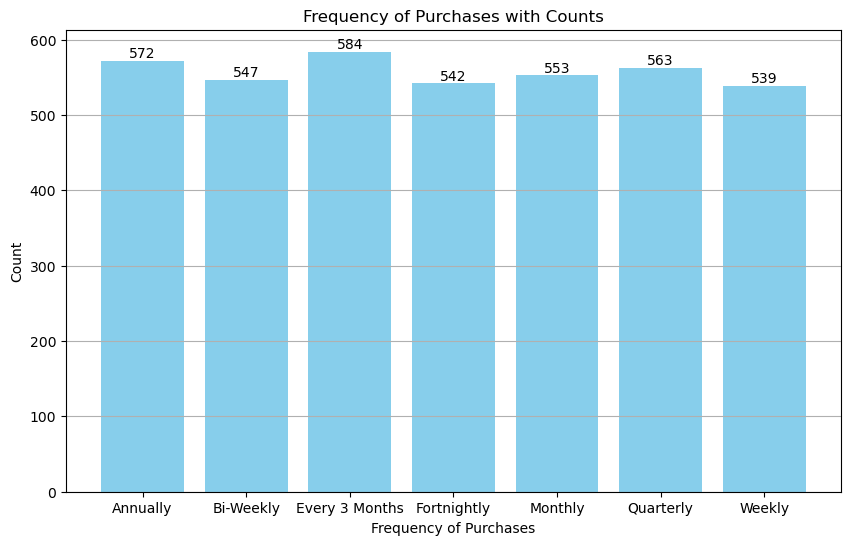

In [1455]:
# graph for Frequency of Purchases

purchase_counts = data['Frequency of Purchases'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for frequency of purchases
plt.bar(purchase_counts.index, purchase_counts.values, color='skyblue')

# Adding counts above each bar
for i, count in enumerate(purchase_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases with Counts')

# Displaying the plot
plt.grid(axis='y')
plt.show()


In [1456]:
# Replace 'No' with 0 and 'Yes' with 1 in the 'Subscription Status' column
data['Subscription Status'] = data['Subscription Status'].replace({'No': 0, 'Yes': 1})
data['Discount Applied'] = data['Discount Applied'].replace({'No': 0, 'Yes': 1})
data['Promo Code Used'] = data['Promo Code Used'].replace({'No': 0, 'Yes': 1})

# Define the encoding dictionary based on the counts
payment_encoding = {
    'PayPal': 0,
    'Credit Card': 1,
    'Cash': 2,
    'Debit Card': 3,
    'Venmo': 4,
    'Bank Transfer': 5
}

# Replace payment method with encoded values
data['Payment Method'] = data['Payment Method'].map(payment_encoding)



KeyError: 'Promo Code Used'

In [1457]:
# Define the encoding dictionaries based on the counts
shipping_encoding = {
    'Free Shipping': 0,
    'Standard': 1,
    'Store Pickup': 2,
    'Next Day Air': 3,
    'Express': 4,
    '2-Day Shipping': 5
}

season_encoding = {
    'Spring': 0,
    'Fall': 1,
    'Winter': 2,
    'Summer': 3
}

frequency_encoding = {
    'Every 3 Months': 0,
    'Annually': 1,
    'Quarterly': 2,
    'Monthly': 3,
    'Bi-Weekly': 4,
    'Fortnightly': 5,
    'Weekly': 6
}
category_encoding = {
    'Clothing': 0,
    'Accessories': 1,
    'Footwear': 2,
    'Outerwear': 3
}

size_encoding ={
    'M': 0,
    'L': 1,
    'S': 2,
    'XL':3
}

gender_encoding={
    'Male':1,
    'Female': 0
}

# Replace categories with encoded values
data['Category'] = data['Category'].map(category_encoding)
data['Gender'] = data['Gender'].map(gender_encoding)
data['Size'] = data['Size'].map(size_encoding)
# Replace frequencies with encoded values
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_encoding)
# Replace seasons with encoded values
data['Season'] = data['Season'].map(season_encoding)
# Replace shipping type with encoded values
data['Shipping Type'] = data['Shipping Type'].map(shipping_encoding)





In [1458]:
# Drop the original 'Purchase Amount (USD)' column as we have Purchase Amount Tier
data.drop(columns=['Purchase Amount (USD)'], inplace=True)


In [1460]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


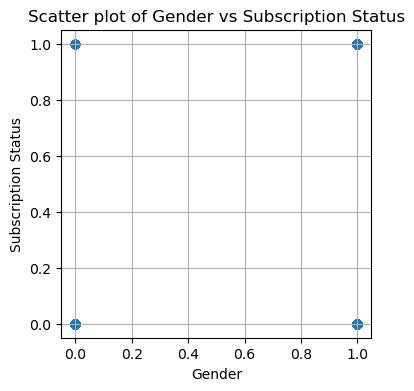

In [1375]:

# Step 2: Calculate the correlation matrix
correlation_matrix = data.corr()

# Step 3: Identify variables with the highest absolute correlation coefficients with the target variable
target_variable = 'Subscription Status'
best_variables = correlation_matrix[target_variable].abs().nlargest(4).index[1:]  # Exclude target variable itself

# Step 4: Create scatter plots for the best variables
for var in best_variables:
    plt.figure(figsize=(4, 4))
    plt.scatter(data[var], data[target_variable])
    plt.title(f'Scatter plot of {var} vs {target_variable}')
    plt.xlabel(var)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()


In [1461]:
import numpy as np

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data['Discount Applied'], data['Subscription Status'])[0, 1]

# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(data['Discount Applied'], data['Subscription Status'])
plt.title('Scatter plot of Discount Applied vs Subscription Status')
plt.xlabel('Discount Applied')
plt.ylabel('Subscription Status')
plt.grid(True)
plt.show()

# Display correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.6642534205335895


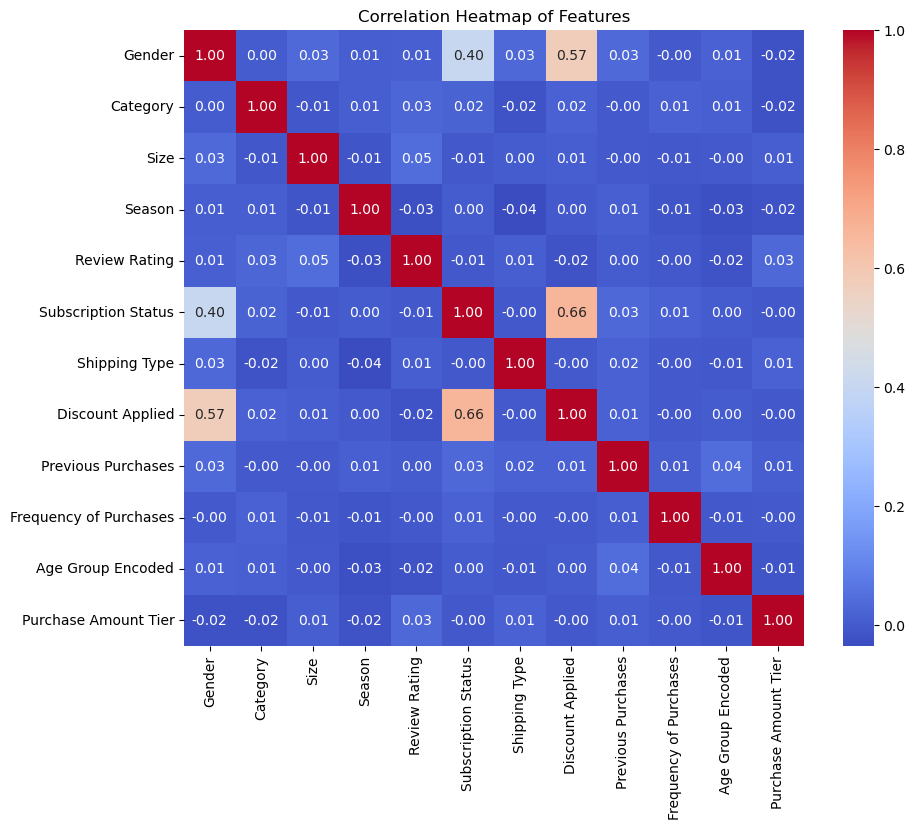

Features closely correlated with Subscription status:
Discount Applied          0.664253
Gender                    0.403359
Previous Purchases        0.029879
Category                  0.017082
Frequency of Purchases    0.014978
Season                    0.003025
Age Group Encoded         0.003013
Purchase Amount Tier     -0.003244
Shipping Type            -0.004256
Size                     -0.006080
Review Rating            -0.006368
Name: Subscription Status, dtype: float64


In [1462]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing relevant features including 'Subscription Status'

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Extract correlation values with 'Subscription Status'
subscription_correlation = correlation_matrix['Subscription Status'].drop('Subscription Status')

# Sort correlations in descending order
subscription_correlation = subscription_correlation.sort_values(ascending=False)

# Print correlations
print("Features closely correlated with Subscription status:")
print(subscription_correlation)


In [1463]:

# Compute correlation matrix
correlation_matrix = data.corr()

print(correlation_matrix)

                          Gender  Category      Size    Season  Review Rating  \
Gender                  1.000000  0.001398  0.033743  0.008816       0.010665   
Category                0.001398  1.000000 -0.010273  0.005139       0.025811   
Size                    0.033743 -0.010273  1.000000 -0.014065       0.045004   
Season                  0.008816  0.005139 -0.014065  1.000000      -0.027171   
Review Rating           0.010665  0.025811  0.045004 -0.027171       1.000000   
Subscription Status     0.403359  0.017082 -0.006080  0.003025      -0.006368   
Shipping Type           0.030786 -0.018151  0.002339 -0.035526       0.007512   
Discount Applied        0.574499  0.015779  0.008557  0.000676      -0.016125   
Previous Purchases      0.033702 -0.001267 -0.002444  0.012694       0.003046   
Frequency of Purchases -0.001170  0.014107 -0.005186 -0.013172      -0.004817   
Age Group Encoded       0.014253  0.011175 -0.000233 -0.027210      -0.017799   
Purchase Amount Tier   -0.02

In [1464]:
# Calculate the proportion of subscribers for each review rating
proportion_subscribers = data.groupby('Review Rating')['Subscription Status'].mean().reset_index()
# Plotting
plt.figure(figsize=(10, 6))
# Plotting the relationship between review ratings and proportion of subscribers
plt.plot(proportion_subscribers['Review Rating'], proportion_subscribers['Subscription Status'], marker='o')
# Adding labels and title
plt.xlabel('Review Rating')
plt.ylabel('Proportion of Subscribers')
plt.title('Proportion of Subscribers by Review Rating')
plt.grid(True)
plt.show()

In [1465]:
data

Gender  Category  Size  Season  Review Rating  Subscription Status  \
0          1         0     1       2            3.1                    1   
1          1         0     1       2            3.1                    1   
2          1         0     2       0            3.1                    1   
3          1         2     0       0            3.5                    1   
4          1         0     0       0            2.7                    1   
...      ...       ...   ...     ...            ...                  ...   
3895       0         0     1       3            4.2                    0   
3896       0         1     1       0            4.5                    0   
3897       0         1     1       0            2.9                    0   
3898       0         2     2       3            3.8                    0   
3899       0         1     0       0            3.1                    0   

      Shipping Type  Discount Applied  Previous Purchases Payment Method  \
0                 4                 1                14.0          Venmo   
1                 4                 1                 2.0           Cash   
2                 0                 1                23.0    Credit Card   
3                 3                 0                49.0         PayPal   
4                 0                 0                31.0         PayPal   
...             ...               ...                 ...            ...   
3895              5                 0                32.0          Venmo   
3896              2                 0                 NaN  Bank Transfer   
3897              1                 0                24.0          Venmo   
3898              4                 0                24.0          Venmo   
3899              2                 0                33.0          Venmo   

      Frequency of Purchases    Age Group  Age Group Encoded  \
0                          5  Middle-Aged                  2   
1                          5  Young Adult                  0   
2                          6        Adult                  1   
3                          6  Young Adult                  0   
4                          1        Adult                  1   
...                      ...          ...                ...   
3895                       6        Adult                  1   
3896                       4  Middle-Aged                  2   
3897                       2        Adult                  1   
3898                       6        Adult                  1   
3899                       2  Middle-Aged                  2   

      Purchase Amount Tier  
0                        1  
1                        1  
2                        1  
3                        1  
4                        0  
...                    ...  
3895                     0  
3896                     0  
3897                     0  
3898                     1  
3899                     1  

[3900 rows x 14 columns]

In [1381]:
import pandas as pd
from scipy.stats import chi2_contingency

threshold = 0.05
# Create a contingency table
contingency_table = pd.crosstab(data['Subscription Status'], data['Review Rating'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < threshold:
    print("There is a significant relationship between Subscription Status and Review Rating.")
else:
    print("There is no significant relationship between Subscription Status and Review Rating.")
    
# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)




There is no significant relationship between Subscription Status and Review Rating.
Chi-square statistic: 20.909144372519954
p-value: 0.6976647480100138


### MULTICOLLINEARITY

In [1382]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming you have subscription dataset loaded as 'subscription_data'
# Assuming 'subscription_data' contains predictor variables (features) and target variable (Subscription Status)
# Adjust column names accordingly

# Features DataFrame: Exclude the target variable 'Subscription Status'
subscription_features_df = data.drop(columns=['Subscription Status'])

# Target DataFrame: Include only the target variable 'Subscription Status'
subscription_target_df = data[['Subscription Status']]

# Assuming there are some columns you want to exclude from the analysis
# Dropping unwanted columns from features DataFrame
subscription_features2_df = subscription_features_df.drop(columns=['Age Group'])

# Drop rows with missing values in any predictor variable
subscription_features2_df = subscription_features2_df.dropna()

# Define predictor and target variables
X = subscription_features2_df
Y = subscription_target_df.loc[X.index]  # Ensure target index matches predictor index after dropping missing values

# Add constant to predictor variables
X = sm.add_constant(X)

# Fit Ordinary Least Squares (OLS) model
model = sm.OLS(Y, X)
results = model.fit()

# Print model summary
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     Subscription Status   R-squared:                       0.442
Model:                             OLS   Adj. R-squared:                  0.440
Method:                  Least Squares   F-statistic:                     255.8
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                         02:57:19   Log-Likelihood:                -1227.7
No. Observations:                 3886   AIC:                             2481.
Df Residuals:                     3873   BIC:                             2563.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [1383]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                   feature        VIF
0                    const  45.793142
1                   Gender   1.496697
2                 Category   1.002465
3                     Size   1.003621
4                   Season   1.004397
5            Review Rating   1.006195
6            Shipping Type   1.003681
7         Discount Applied   1.492930
8       Previous Purchases   1.003912
9           Payment Method   1.002192
10  Frequency of Purchases   1.000580
11       Age Group Encoded   1.003741
12    Purchase Amount Tier   1.002956


In [1384]:
###Logistic Regression with const

import statsmodels.api as sm

# Add a constant term to the independent variables
X = sm.add_constant(data['Discount Applied'])

# Define the dependent variable
y = data['Subscription Status']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.335016
         Iterations 8
                            Logit Regression Results                           
Dep. Variable:     Subscription Status   No. Observations:                 3900
Model:                           Logit   Df Residuals:                     3898
Method:                            MLE   Df Model:                            1
Date:                 Tue, 02 Apr 2024   Pseudo R-squ.:                  0.4256
Time:                         02:57:19   Log-Likelihood:                -1306.6
converged:                        True   LL-Null:                       -2274.7
Covariance Type:             nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9000      0.151    -25.901      0.000      -4.195      -3.605
Dis